## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset and read
df=pd.read_csv("ds_salaries.csv")
df.head(5)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
# Check the row and columns
print(f"There is {df.shape[0]} row and {df.shape[1]} columns present in dataset")

There is 607 row and 12 columns present in dataset


## EDA(Exploratory Data Analysis)
EDA is an approch to analysis dataset to sammarize their main characteristic ,often
using visual methods,It helps in understanding the data identifying patterns and detecting
anomalies or outliers.

In [4]:
# Dimension of dataset
df.shape

(607, 12)

In [5]:
# check the columns name
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [6]:
# Check for duplicate rows
if df.duplicated().any():
    df = df.drop_duplicates()
    print("Duplicate rows removed")
else:
    print("No duplicate rows present")

No duplicate rows present


### Summary of Dataset

In [7]:
# basic information of all values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [8]:
# Find the statistical summary of datatype
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [9]:
# check the unique values
df.nunique()

Unnamed: 0            607
work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

### Explore Categorical veriables


In [10]:
categorical=[var for var in df.columns if df[var].dtype=='O']
print("There is {} categorical values are present \n".format(len(categorical)))
print("veriable are:",categorical)      

There is 7 categorical values are present 

veriable are: ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']


In [11]:
df[categorical].head()

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
0,MI,FT,Data Scientist,EUR,DE,DE,L
1,SE,FT,Machine Learning Scientist,USD,JP,JP,S
2,SE,FT,Big Data Engineer,GBP,GB,GB,M
3,MI,FT,Product Data Analyst,USD,HN,HN,S
4,SE,FT,Machine Learning Engineer,USD,US,US,L


In [12]:
# Find the missing values of categorical values
df[categorical].isnull().sum()

experience_level      0
employment_type       0
job_title             0
salary_currency       0
employee_residence    0
company_location      0
company_size          0
dtype: int64

### Frequency count of categorical values

In [13]:
for var in df[categorical]:
    print(df[var].value_counts)

<bound method IndexOpsMixin.value_counts of 0      MI
1      SE
2      SE
3      MI
4      SE
       ..
602    SE
603    SE
604    SE
605    SE
606    MI
Name: experience_level, Length: 607, dtype: object>
<bound method IndexOpsMixin.value_counts of 0      FT
1      FT
2      FT
3      FT
4      FT
       ..
602    FT
603    FT
604    FT
605    FT
606    FT
Name: employment_type, Length: 607, dtype: object>
<bound method IndexOpsMixin.value_counts of 0                  Data Scientist
1      Machine Learning Scientist
2               Big Data Engineer
3            Product Data Analyst
4       Machine Learning Engineer
                  ...            
602                 Data Engineer
603                 Data Engineer
604                  Data Analyst
605                  Data Analyst
606                  AI Scientist
Name: job_title, Length: 607, dtype: object>
<bound method IndexOpsMixin.value_counts of 0      EUR
1      USD
2      GBP
3      USD
4      USD
      ... 
602    USD
603  

In [14]:
# Explore those veriables
for var in df[categorical]:
    print('\n\n',var,f'has containing {len(df[var].unique())} unique values, are\n ',df[var].unique())




 experience_level has containing 4 unique values, are
  ['MI' 'SE' 'EN' 'EX']


 employment_type has containing 4 unique values, are
  ['FT' 'CT' 'PT' 'FL']


 job_title has containing 50 unique values, are
  ['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketing Data Analyst' 'Cloud Data Engineer' 'Financial Data Analyst'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Data Sci

In [15]:
# value counts as per experience level
df.experience_level.value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

In [16]:
# value counts as per company size
df.company_size.value_counts()

M    326
L    198
S     83
Name: company_size, dtype: int64

In [17]:
# check for cardinality in categorical veriables
for var in categorical:
    print(var,'contain', len(df[var].unique()),'lables')

experience_level contain 4 lables
employment_type contain 4 lables
job_title contain 50 lables
salary_currency contain 17 lables
employee_residence contain 57 lables
company_location contain 50 lables
company_size contain 3 lables


## Explore numerical veriables

In [18]:
numerical=[var for var in df.columns if df[var].dtype!='O']
print("There is {} categorical values are present \n".format(len(numerical)))
print("veriable are:",numerical)  

There is 5 categorical values are present 

veriable are: ['Unnamed: 0', 'work_year', 'salary', 'salary_in_usd', 'remote_ratio']


In [19]:
df[numerical].head()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
0,0,2020,70000,79833,0
1,1,2020,260000,260000,0
2,2,2020,85000,109024,50
3,3,2020,20000,20000,0
4,4,2020,150000,150000,50


In [20]:
# check the missing values in numerical values
df[numerical].isnull().sum()

Unnamed: 0       0
work_year        0
salary           0
salary_in_usd    0
remote_ratio     0
dtype: int64

In [21]:
# value counts as per remote ratio
df.remote_ratio.value_counts()

100    381
0      127
50      99
Name: remote_ratio, dtype: int64

In [22]:
# value count as per yearwise number of records
df.work_year.value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

### Outliers

In [23]:
# calculate Thresold values
max_thresold=df['salary'].mean()+3*df['salary'].std()
min_thresold=df['salary'].mean()-3*df['salary'].std()
print(max_thresold,min_thresold)

4957072.522510521 -4309072.397304591


In [24]:
# Filter out outliers
df1=df[(df['salary']>min_thresold)&(df['salary']<max_thresold)]
df1.reset_index(drop=True,inplace=True)

In [25]:
# Dimension of new dataset
print("Before filter:\n",df.shape)
print("\nAFter filter:\n",df1.shape)

Before filter:
 (607, 12)

AFter filter:
 (600, 12)


In [26]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [27]:
# Number of jobs as per job title categorised by employment type
EmployeeType = pd.pivot_table(
    df, 
    values='Unnamed: 0', 
    index='job_title', 
    columns='employment_type', 
    aggfunc='count',
    fill_value=0
)
EmployeeType

employment_type,CT,FL,FT,PT
job_title,,,,
3D Computer Vision Researcher,0,0,0,1
AI Scientist,0,0,5,2
Analytics Engineer,0,0,4,0
Applied Data Scientist,0,0,5,0
Applied Machine Learning Scientist,1,0,3,0
BI Data Analyst,0,0,6,0
Big Data Architect,0,0,1,0
Big Data Engineer,0,0,8,0
Business Data Analyst,1,0,4,0


In [28]:
salary = df.groupby('employment_type')['salary_in_usd'].mean().sort_values()
salary

employment_type
PT     33070.500000
FL     48000.000000
FT    113468.073129
CT    184575.000000
Name: salary_in_usd, dtype: float64

In [29]:
# Job role wise salary
payment=df.groupby('job_title')['salary_in_usd'].mean().sort_values().reset_index()
payment

,job_title,salary_in_usd
0,3D Computer Vision Researcher,5409.000000
1,Product Data Analyst,13036.000000
2,NLP Engineer,37236.000000
3,Computer Vision Engineer,44419.333333
4,Big Data Engineer,51974.000000
5,ETL Developer,54957.000000
6,Finance Data Analyst,61896.000000
7,Data Analytics Engineer,64799.250000
8,AI Scientist,66135.571429
9,Data Science Consultant,69420.714286


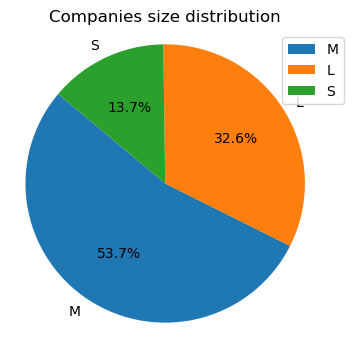

In [30]:
companies=df['company_size'].value_counts()
plt.figure(figsize=(4,4))
ax=plt.pie(companies,labels=companies.index,autopct='%1.1f%%',startangle=140)
plt.legend(companies.index, loc="upper right", bbox_to_anchor=(1.1, 1))
plt.title("Companies size distribution")
plt.axis('equal')
plt.show()

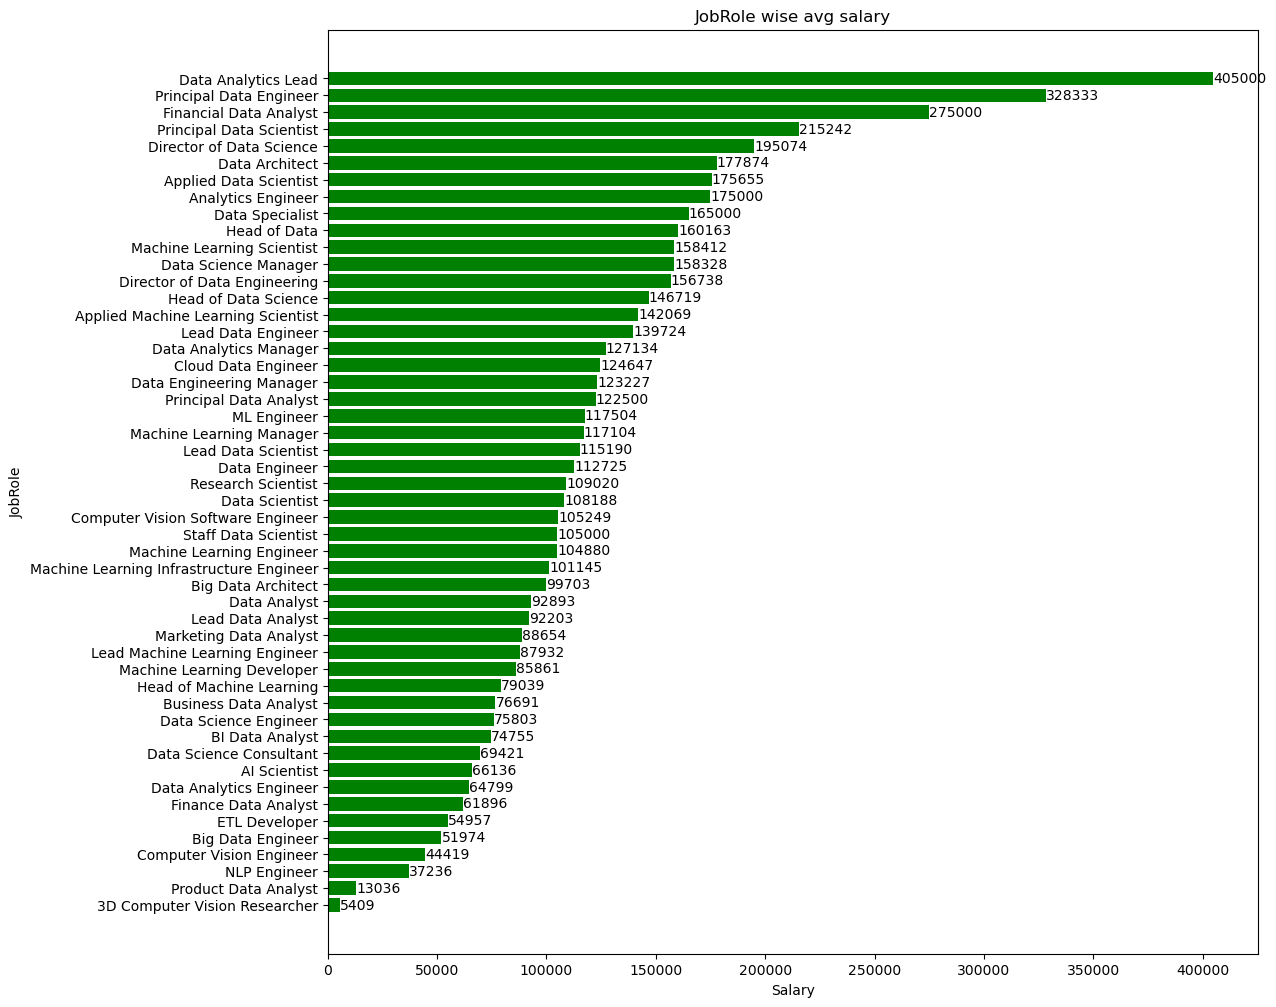

In [31]:

plt.figure(figsize=(12, 12))
bars = plt.barh(payment['job_title'],payment['salary_in_usd'], color='green')
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.0f}', ha='left', va='center', 
             fontsize=10, color='black')
plt.title('JobRole wise avg salary')
plt.xlabel('Salary')
plt.ylabel('JobRole')
plt.show()

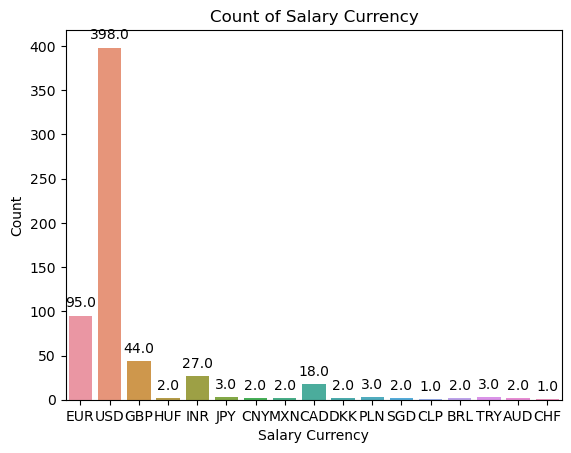

In [32]:
ax=sns.countplot(data=df, x='salary_currency')
plt.title('Count of Salary Currency')
plt.xlabel('Salary Currency')
plt.ylabel('Count')
for i in ax.patches:
    ax.annotate(format(i.get_height(), '.1f'), 
                (i.get_x() + i.get_width() / 2., i.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.show()


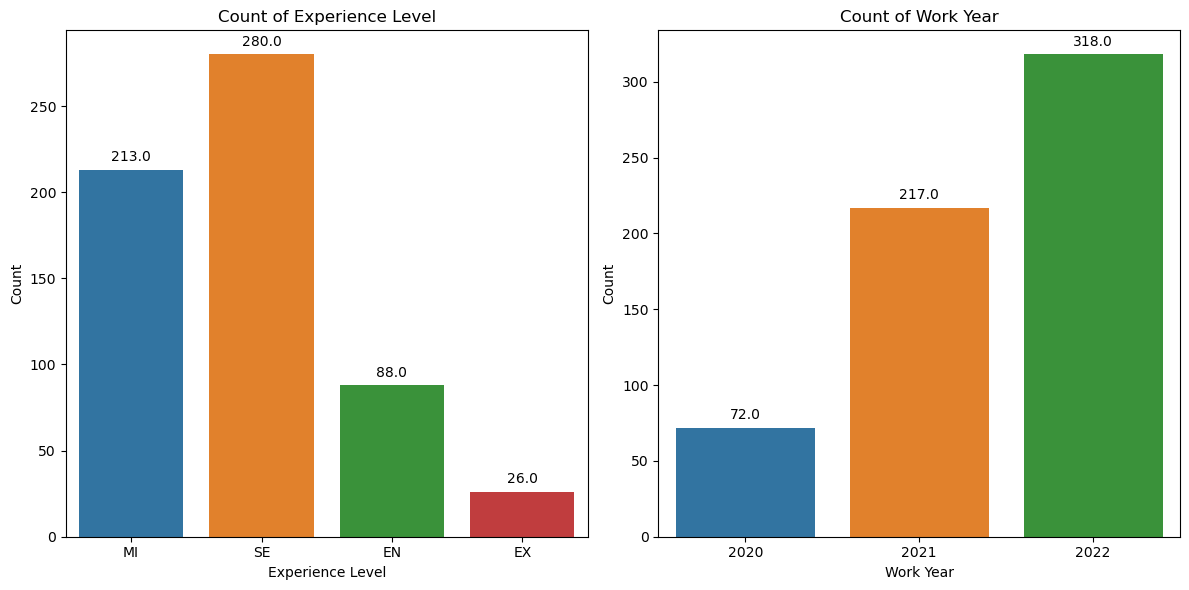

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(data=df, x='experience_level', ax=ax1)
sns.countplot(data=df, x='work_year', ax=ax2)
ax1.set_title('Count of Experience Level')
ax1.set_xlabel('Experience Level')
ax1.set_ylabel('Count')
for i in ax1.patches:
    ax1.annotate(format(i.get_height(), '.1f'), 
                (i.get_x() + i.get_width() / 2., i.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

ax2.set_title('Count of Work Year')
ax2.set_xlabel('Work Year')
ax2.set_ylabel('Count')
for i in ax2.patches:
    ax2.annotate(format(i.get_height(), '.1f'), 
                (i.get_x() + i.get_width() / 2., i.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.tight_layout()
plt.show()


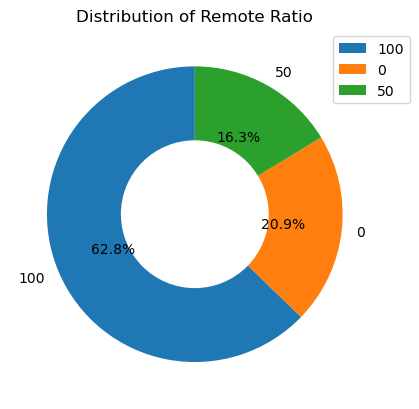

In [34]:
# Create donut chart for remote_ratio
remote_ratio_counts = df['remote_ratio'].value_counts()

plt.pie(remote_ratio_counts, labels=remote_ratio_counts.index, autopct='%1.1f%%', startangle=90)
plt.legend(remote_ratio_counts.index, loc="upper right", bbox_to_anchor=(1.1, 1))
plt.gca().add_artist(plt.Circle((0,0),0.5,fc='white'))
plt.title('Distribution of Remote Ratio')
plt.show()

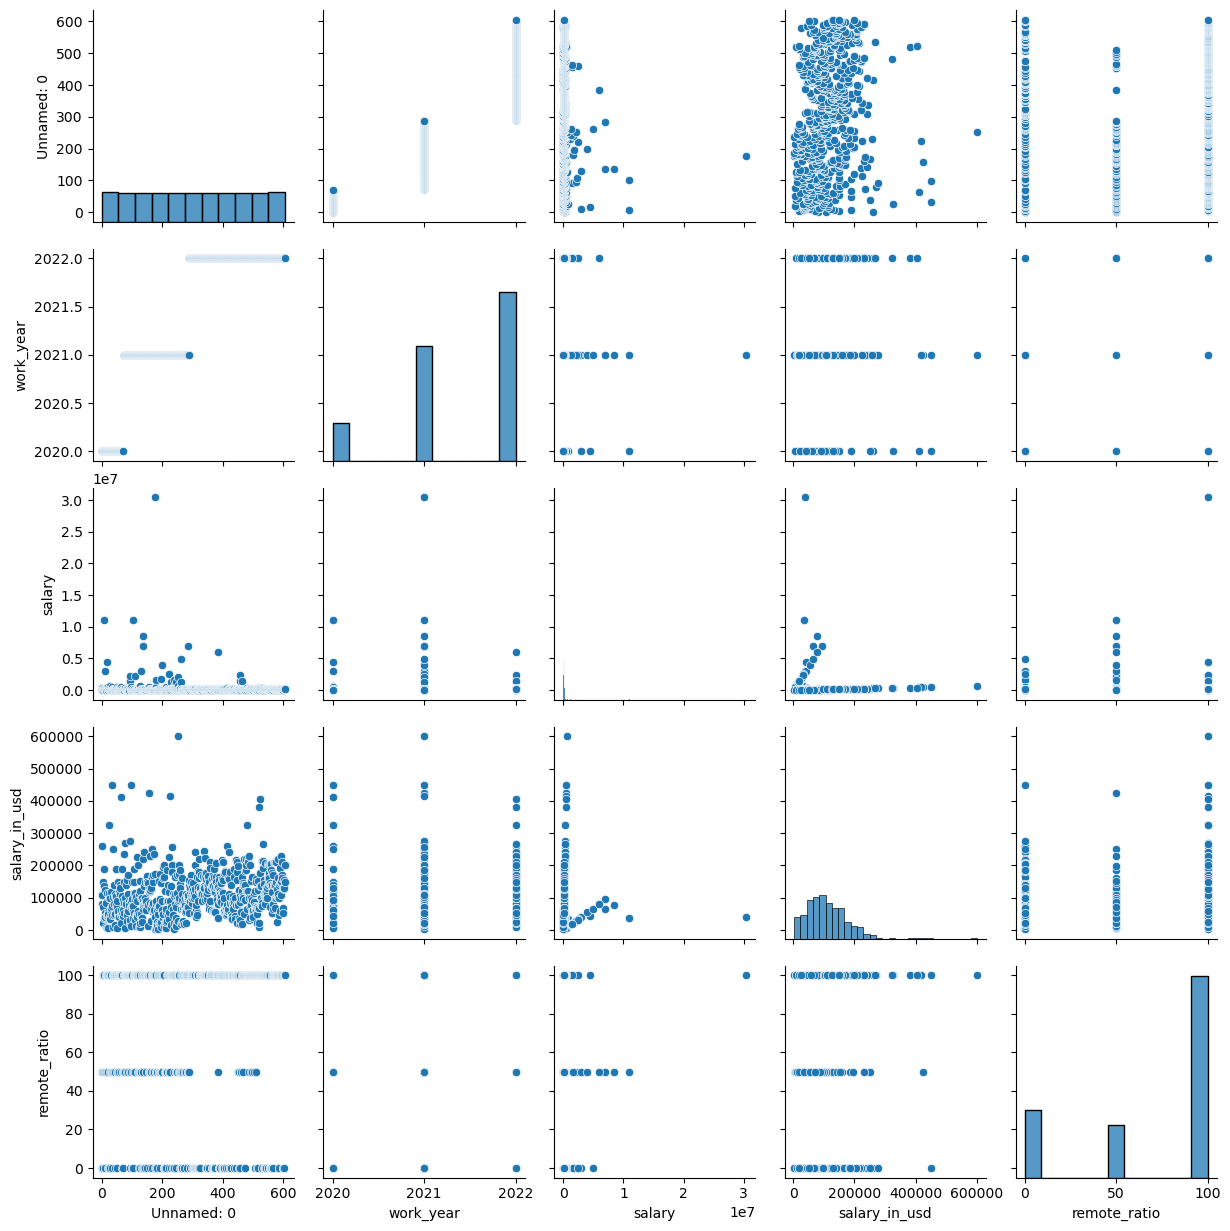

In [35]:
sns.pairplot(df)
plt.show()

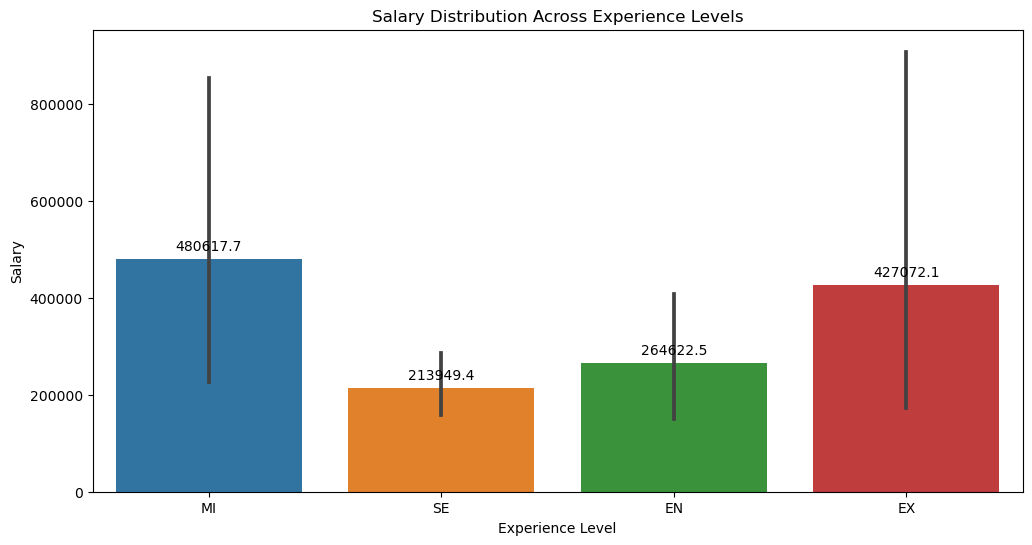

In [36]:
plt.figure(figsize=(12, 6))
ax=sns.barplot(data=df,x='experience_level', y='salary')
plt.title('Salary Distribution Across Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
for i in ax.patches:
    ax.annotate(format(i.get_height(), '.1f'), 
                (i.get_x() + i.get_width() / 2., i.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')
plt.show()

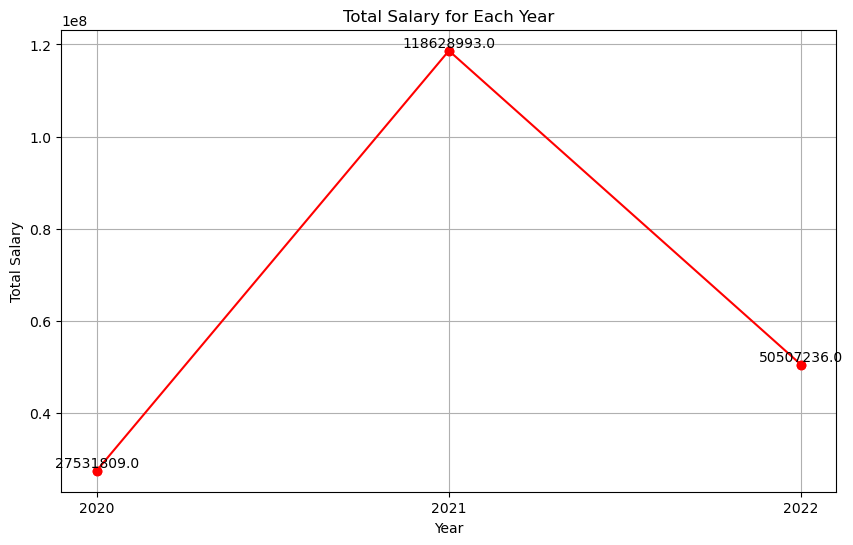

In [37]:

total_salary_per_year = df.groupby('work_year')['salary'].sum()
plt.figure(figsize=(10, 6))
plt.plot(total_salary_per_year.index, total_salary_per_year.values, marker='o', color='red', linestyle='-')
plt.scatter(total_salary_per_year.index, total_salary_per_year.values, color='red')  # Mark data points
plt.title('Total Salary for Each Year')
plt.xlabel('Year')
plt.ylabel('Total Salary')
plt.xticks(total_salary_per_year.index)
for i, txt in enumerate(total_salary_per_year.values):
    plt.annotate(format(txt, '.1f'), (total_salary_per_year.index[i], txt), ha='center', va='bottom')
plt.grid(True)
plt.show()




## Analysis with Linear Regession

In [38]:
# Librabies
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [39]:
# Feature
x=df.drop(['salary','salary_in_usd'],axis=1)
# Target
y=df['salary_in_usd']

In [40]:
# extract columns, that contain categorial data from the data frame the name of
x_cat=df.select_dtypes(include='object').columns.tolist()
x_cat

['experience_level',
 'employment_type',
 'job_title',
 'salary_currency',
 'employee_residence',
 'company_location',
 'company_size']

In [41]:
# Create dummy variables for categorical columns in the datafarm
data=pd.get_dummies(df,dtype=float)
data

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,...,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_L,company_size_M,company_size_S
0,0,2020,70000,79833,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,2020,260000,260000,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,2020,85000,109024,50,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,2020,20000,20000,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,2020,150000,150000,50,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,154000,154000,100,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
603,603,2022,126000,126000,100,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
604,604,2022,129000,129000,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
605,605,2022,150000,150000,100,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [42]:
# Splitting test and train variable
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.2,random_state=2)

In [43]:
# Create linear regression model
model = LinearRegression()

In [44]:
# Scaling the variables of x_train and x_test
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [45]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [46]:
# Fit into the model
model.fit(x_train,y_train)

LinearRegression()

In [47]:
y_pred=model.predict(x_test)
y_pred

array([ 69336.        , 132320.        , 135000.        ,  31615.        ,
        49646.        ,  95836.40337553, 213120.        , 260000.        ,
        70208.38101587, 164000.        , 104890.        , 123000.        ,
        39263.        ,  82528.        ,  81666.        ,  84900.        ,
        33808.        ,  28016.        , 111775.        ,  50000.        ,
        52396.        , 145000.        ,  90320.        ,   6849.0583563 ,
        20000.        , 147800.        ,  62726.        , 116914.        ,
       190200.        , 183600.        ,  61788.66212623,  22611.        ,
        19380.38101587,  63711.        , 159000.        , 220000.        ,
       240000.        , 110037.        , 105000.        , 200000.        ,
        58000.        ,  50000.        , 148261.        ,  58502.50221726,
        79197.        , 168567.99615321, 150000.        , 160000.        ,
       220110.        ,  41689.        , 161342.        , 150000.        ,
        68042.38878593,  

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Absolute Error: 1059.61
Mean Squared Error: 13480321.19
R-squared: 0.9966360704173942


## RandomForestRegression

In [49]:
# Initialize the Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor

In [50]:
# create model1
model1 = RandomForestRegressor(n_estimators=100, random_state=42)
#split train and test
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.2,random_state=2)

In [51]:
# fit in to model
model1.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [52]:
# Make predictions on the testing data
y_pred = model1.predict(x_test)

In [53]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [54]:
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 3656583.4798688535
R^2 Score: 0.999087522532372


## Conclusion
The Random Forest Regressor outperforms the Linear Regression model in terms of accuracy and predictive performance. It has a significantly lower MSE and a higher R-squared score, indicating better fit to the data and improved predictive power.

Therefore, based on these evaluation metrics, it can be concluded that the Random Forest Regressor model provides better predictions for the target variable compared to the Linear Regression model.